Post analysis and plotting

In [8]:
import pandas as pd

# Load the CSV file
file_path = "scenario_results.csv"
df = pd.read_csv(file_path)

##############################################################################################
# Optimized Function to Process Scenarios
##############################################################################################

def process_all_scenarios(df, scenario_dict, output_prefix):
    """
    Optimized function to filter the dataframe based on multiple scenarios and aggregate scores.
    
    Parameters:
    - df: pandas DataFrame
    - scenario_dict: dict, mapping scenario names to a set of (Scenario, Hospital, Process) tuples
    - output_prefix: str, prefix for the output CSV filenames
    
    Returns:
    - scenario_results: dict, mapping scenario names to their aggregated DataFrame
    """
    scenario_results = {}
    for scenario_name, scenario_set in scenario_dict.items():
        # Filter dataset based on scenario_set
        filtered_df = df[
            df.apply(lambda row: (row["Scenario"], row["Hospital"], row["Process"]) in scenario_set, axis=1)
        ]
        # Aggregate by hospital and impact category
        aggregated_df = filtered_df.groupby(["Hospital", "Impact Category",]).agg({
            "Raw Score": "sum",
            "Normalized Score": "sum"
        }).reset_index()
        # Save to CSV
        output_path = f"{output_prefix}_{scenario_name}.csv"
        aggregated_df.to_csv(output_path, index=False)
        # Store result
        scenario_results[scenario_name] = aggregated_df
    
    return scenario_results

##############################################################################################
# Define Scenarios with Recommended Methods for Specific Hospitals
##############################################################################################

all_scenarios = {
    "Reference": {
        ("BASELINE", "KBTH", "INCINERATION"),
        ("COMPREHENSIVE_ALTS", "KBTH", "LANDFILL"),
        ("BASELINE", "KATH", "INCINERATION"),
        ("COMPREHENSIVE_ALTS", "KATH", "LANDFILL"),
        ("BASELINE", "CCTH", "AUTOCLAVE"),
        ("COMPREHENSIVE_ALTS", "CCTH", "LANDFILL"),
        ("BASELINE", "BRH", "INCINERATION"),
        ("COMPREHENSIVE_ALTS", "BRH", "LANDFILL"),
        ("BASELINE", "UCCH", "INCINERATION"),
        ("COMPREHENSIVE_ALTS", "UCCH", "LANDFILL"),             
    },
    "S1": {
        ("ENHANCED_INCINERATION", "KBTH", "INCINERATION"),
        ("ENHANCED_INCINERATION", "KBTH", "AUTOCLAVE"),
        ("ENHANCED_INCINERATION", "KBTH", "MICROWAVE"),
        ("ENHANCED_INCINERATION", "KATH", "INCINERATION"),
        ("ENHANCED_INCINERATION", "KATH", "AUTOCLAVE"),
        ("ENHANCED_INCINERATION", "KATH", "MICROWAVE"),
        ("ENHANCED_INCINERATION", "CCTH", "AUTOCLAVE"),
        ("ENHANCED_INCINERATION", "CCTH", "MICROWAVE"),
        ("ENHANCED_INCINERATION", "BRH", "AUTOCLAVE"),
        ("ENHANCED_INCINERATION", "BRH", "MICROWAVE"),
        ("ENHANCED_INCINERATION", "UCCH", "AUTOCLAVE"),
        ("ENHANCED_INCINERATION", "UCCH", "MICROWAVE"),
    },
    "S2": {
        ("HIGH_TECH", "KBTH", "INCINERATION"),
        ("HIGH_TECH", "KBTH", "AUTOCLAVE"),
        ("HIGH_TECH", "KBTH", "MICROWAVE"),
        ("HIGH_TECH", "KATH", "INCINERATION"),
        ("HIGH_TECH", "KATH", "AUTOCLAVE"),
        ("HIGH_TECH", "KATH", "MICROWAVE"),
        ("HIGH_TECH", "CCTH", "AUTOCLAVE"),
        ("HIGH_TECH", "CCTH", "MICROWAVE"),
        ("HIGH_TECH", "BRH", "AUTOCLAVE"),
        ("HIGH_TECH", "BRH", "MICROWAVE"),
        ("HIGH_TECH", "UCCH", "AUTOCLAVE"),
        ("HIGH_TECH", "UCCH", "MICROWAVE"),
    },
    "S3": {
        ("POLICY_NETZERO", "KBTH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "KBTH", "MICROWAVE"),
        ("POLICY_NETZERO", "KBTH", "INCINERATION"),
        ("POLICY_NETZERO", "KATH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "KATH", "MICROWAVE"),
        ("POLICY_NETZERO", "KATH", "INCINERATION"),
        ("POLICY_NETZERO", "CCTH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "CCTH", "MICROWAVE"),
        ("POLICY_NETZERO", "BRH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "BRH", "MICROWAVE"),
        ("POLICY_NETZERO", "UCCH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "UCCH", "MICROWAVE"),
    },
    "S4": {
        ("POLICY_NETZERO", "KBTH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "KBTH", "CHEM_DISINFECTION"),
        ("POLICY_NETZERO", "KBTH", "INCINERATION"),
        ("POLICY_NETZERO", "KATH", "PYROLYSIS"),
        ("POLICY_NETZERO", "KATH", "MICROWAVE"),
        ("POLICY_NETZERO", "KATH", "INCINERATION"),
        ("POLICY_NETZERO", "CCTH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "CCTH", "CHEM_DISINFECTION"),
        ("POLICY_NETZERO", "BRH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "BRH", "CHEM_DISINFECTION"),
        ("POLICY_NETZERO", "UCCH", "AUTOCLAVE"),
        ("POLICY_NETZERO", "UCCH", "CHEM_DISINFECTION"),
    },
    "Worst": {
        ("WORST_CASE", "KBTH", "INCINERATION"),
        ("WORST_CASE", "KATH", "INCINERATION"),
        ("WORST_CASE", "CCTH", "AUTOCLAVE"),
        ("WORST_CASE", "BRH", "INCINERATION"),
        ("WORST_CASE", "UCCH", "INCINERATION"),
        ("WORST_CASE", "KBTH", "LANDFILL"),
        ("WORST_CASE", "KATH", "LANDFILL"),
        ("WORST_CASE", "CCTH", "LANDFILL"),
        ("WORST_CASE", "BRH", "LANDFILL"),
        ("WORST_CASE", "UCCH", "LANDFILL"),
    },
}

##############################################################################################
# Process All Scenarios
##############################################################################################

scenario_results = process_all_scenarios(df, all_scenarios, "scenario_results")

##############################################################################################
# Summary
##############################################################################################

print("All scenarios have been processed successfully. CSV files are saved")


All scenarios have been processed successfully. CSV files are saved


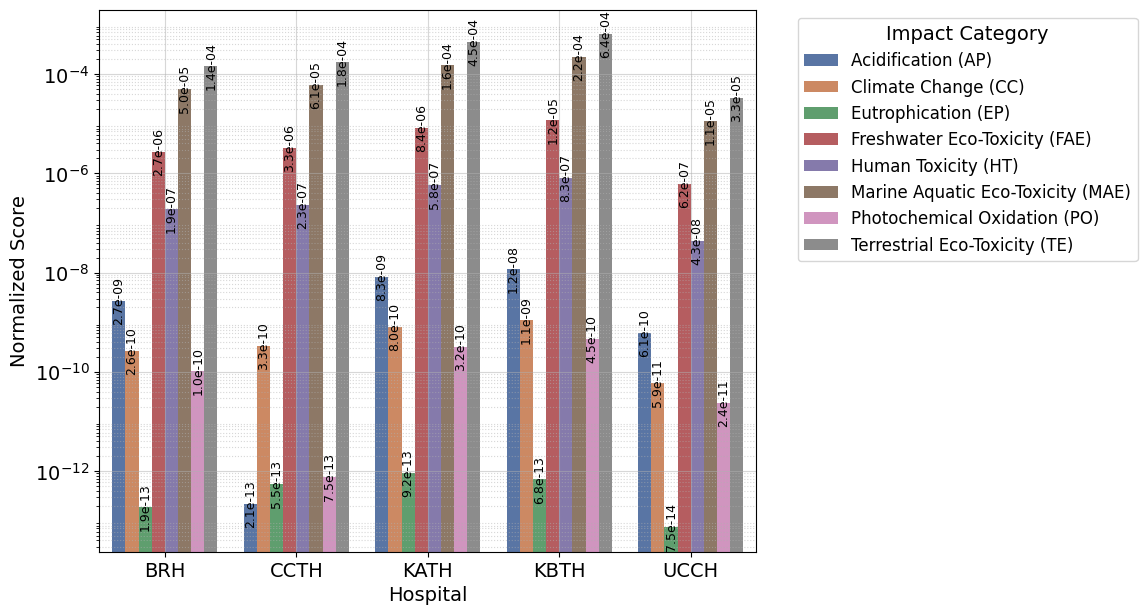

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use the reference scenario results from your existing code
reference_df = scenario_results["Reference"]

# Create figure with larger size
plt.figure(figsize=(11.7, 6.3))  # Increased figure size

# Create grouped bar plot using seaborn with wider bars
ax = sns.barplot(data=reference_df, 
                x='Hospital', 
                y='Normalized Score',
                hue='Impact Category',
                palette='deep',
                width=0.8)  # Increased bar width

# Set log scale for y-axis
plt.yscale('log')

# Enable minor ticks on y-axis
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100))
ax.yaxis.set_minor_formatter(plt.NullFormatter())  # No labels for minor ticks

# Add grid lines for both major and minor ticks
plt.grid(True, which="major", ls="-", alpha=0.5)
plt.grid(True, which="minor", ls=":", alpha=0.5)

# Customize the plot with larger font sizes
#plt.title('Comparison of Impact Categories Across Hospitals (Current practices)', 
         #fontsize=16, pad=20)
plt.xlabel('Hospital', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Adjust legend - moved inside the plot
plt.legend(title='Impact Category', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          fontsize=12,
          title_fontsize=14)



# Add value labels on top of bars
def add_value_labels(ax):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2,
                   height/3,
                   f'{height:.1e}',  # Scientific notation
                   ha='center',
                   va='bottom',
                   rotation=90,
                   fontsize=9)

add_value_labels(ax)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('hospital_impact_comparison_reference.png', 
            bbox_inches='tight', 
            dpi=300)

plt.show()
reference_df.to_csv('reference_df.csv', index=False)

In [9]:
import pandas as pd

##############################################################################################
# Load Data
##############################################################################################

# Load the CSV file
file_path = "scenario_results.csv"
df = pd.read_csv(file_path)

##############################################################################################
# Optimized Function to Process Scenarios
##############################################################################################

def process_all_scenarios(df, scenario_dict, output_prefix):
    """
    Optimized function to filter the dataframe based on multiple scenarios and aggregate scores.

    Parameters:
    - df: pandas DataFrame
    - scenario_dict: dict, mapping scenario names to a set of (Scenario, Hospital, Process) tuples
    - output_prefix: str, prefix for the output CSV filenames

    Returns:
    - scenario_results: dict, mapping scenario names to their aggregated DataFrame
    """
    scenario_results = {}
    for scenario_name, scenario_set in scenario_dict.items():
        # Filter dataset based on scenario_set
        filtered_df = df[
            df.apply(lambda row: (row["Scenario"], row["Hospital"], row["Process"]) in scenario_set, axis=1)
        ]
        # Aggregate by hospital and impact category
        aggregated_df = filtered_df.groupby(["Hospital", "Impact Category"]).agg({
            "Raw Score": "sum",
            "Normalized Score": "sum"
        }).reset_index()
        # Save to CSV
        output_path = f"{output_prefix}_{scenario_name}.csv"
        aggregated_df.to_csv(output_path, index=False)
        # Store result
        scenario_results[scenario_name] = aggregated_df
    
    return scenario_results

##############################################################################################
# Process All Scenarios
##############################################################################################

scenario_results = process_all_scenarios(df, all_scenarios, "scenario_results")

##############################################################################################
# Calculate Percentage Change Relative to Baseline (Reference)
##############################################################################################

def calculate_percentage_change(ref_df, comp_df, score_type="Raw Score"):
    """
    Calculates the percentage change of a score type between a comparison dataframe and the baseline reference.

    Parameters:
    - ref_df: pandas DataFrame, reference (baseline) data
    - comp_df: pandas DataFrame, comparison data
    - score_type: str, either "Raw Score" or "Normalized Score"

    Returns:
    - DataFrame with percentage change for the specified score type
    """
    merged_df = pd.merge(ref_df, comp_df, on=["Hospital", "Impact Category"], suffixes=('_Ref', '_Comp'), how='left')

    # Handle division by zero by replacing zeros in reference with NaN
    merged_df[f'{score_type}_Ref'] = merged_df[f'{score_type}_Ref'].replace(0, pd.NA)
    
    # Calculate percentage change
    merged_df[f'Percentage Change {score_type}'] = (
        (merged_df[f'{score_type}_Comp'] - merged_df[f'{score_type}_Ref']) 
        / merged_df[f'{score_type}_Ref']
    ) * 100

    return merged_df[['Hospital', 'Impact Category', f'Percentage Change {score_type}']]

##############################################################################################
# Compute Percentage Change for All Scenarios Except the Baseline
##############################################################################################

# Define the baseline scenario explicitly
baseline_scenario_name = "Reference"  # This corresponds to "BASELINE" scenario in the dataset
baseline_df = scenario_results[baseline_scenario_name]

# Initialize list to store percentage change data
percentage_changes = []

for scenario, df_scenario in scenario_results.items():
    if scenario == baseline_scenario_name:
        continue  # Skip baseline scenario itself

    # Calculate percentage change for Raw Score
    pct_change_raw = calculate_percentage_change(baseline_df, df_scenario, "Raw Score")
    pct_change_raw['Scenario'] = scenario

    # Calculate percentage change for Normalized Score
    pct_change_norm = calculate_percentage_change(baseline_df, df_scenario, "Normalized Score")
    pct_change_norm['Scenario'] = scenario

    # Merge the Raw Score and Normalized Score changes
    pct_change = pd.merge(
        pct_change_raw, 
        pct_change_norm, 
        on=["Hospital", "Impact Category", "Scenario"]
    )
    percentage_changes.append(pct_change)

# Concatenate all percentage changes into a single DataFrame
percentage_change_df = pd.concat(percentage_changes, ignore_index=True)

# Save the percentage change DataFrame to CSV
output_path = "percentage_change_relative_to_baseline.csv"
percentage_change_df.to_csv(output_path, index=False)

##############################################################################################
# Summary
##############################################################################################

print("All scenarios have been processed successfully. CSV files are saved.")
print("Percentage change calculations relative to the baseline scenario have been completed.")
print(f"Results saved to: {output_path}")


All scenarios have been processed successfully. CSV files are saved.
Percentage change calculations relative to the baseline scenario have been completed.
Results saved to: percentage_change_relative_to_baseline.csv


Plotting

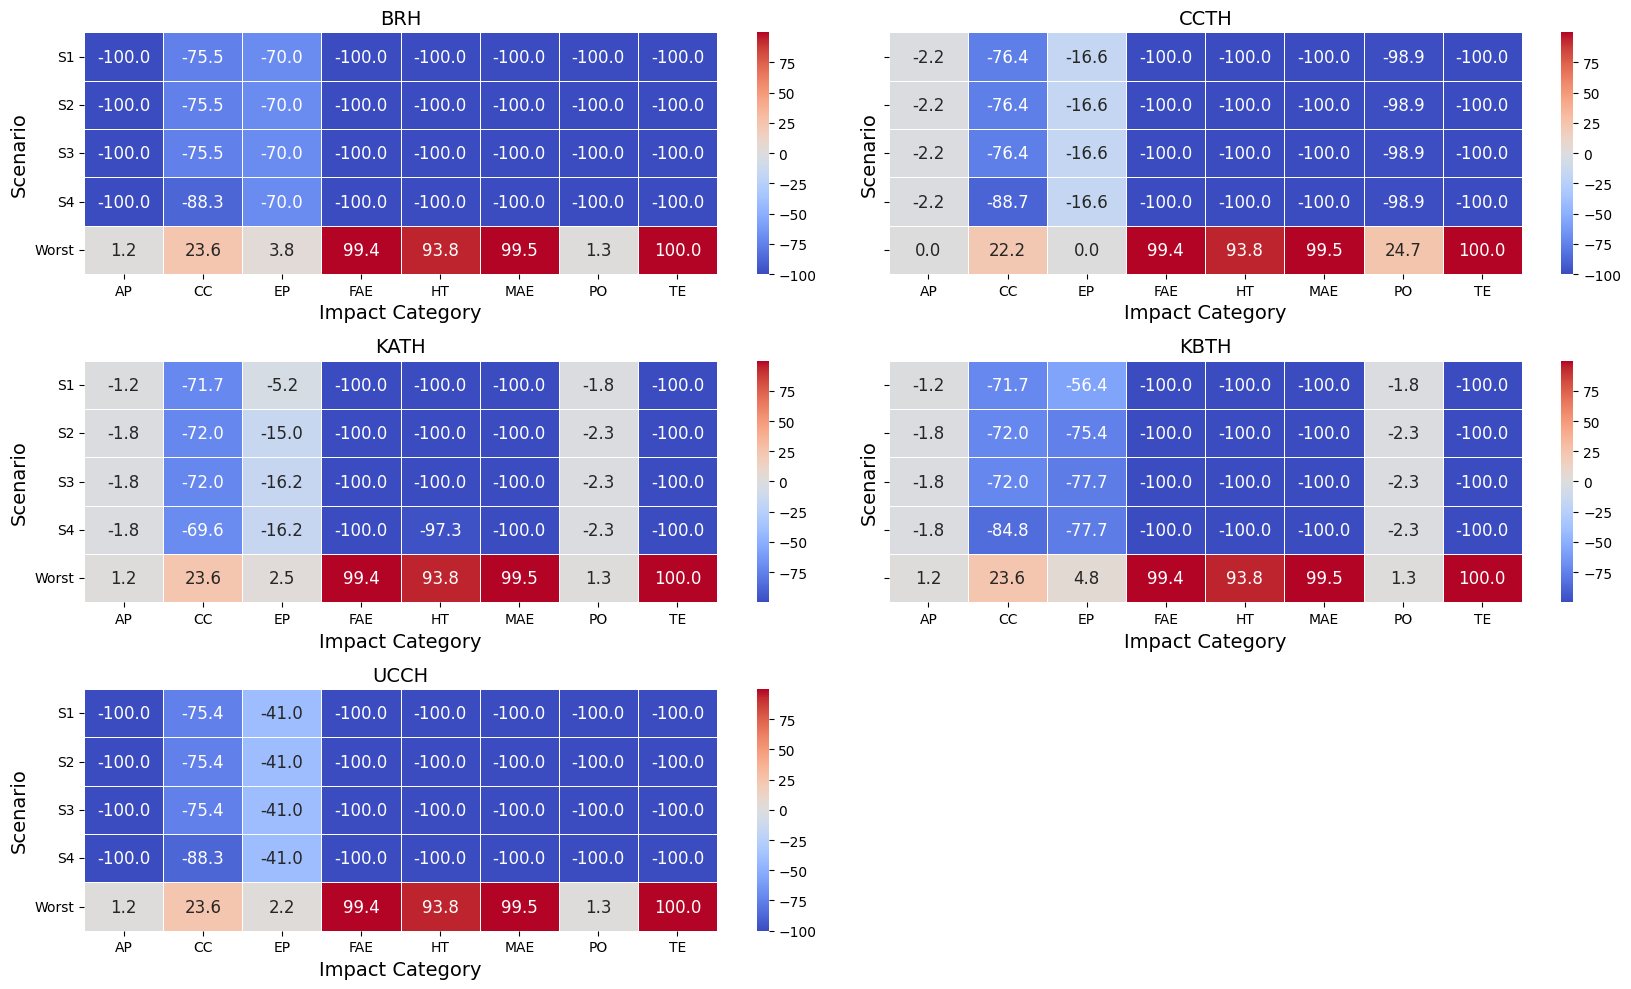

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmaps_single_figure(file_path, cmap="coolwarm", annot=True, fmt=".1f", 
                                linewidths=0.5, fontsize=12, title_size=14, 
                                xlabel_size=14, ylabel_size=14, xtick_rotation=0, ytick_rotation=0):
    """
    Function to plot heatmaps for percentage change relative to baseline,
    considering different scenarios for all hospitals in a single figure.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    - cmap (str): Colormap for heatmap.
    - annot (bool): Whether to annotate the heatmap with values.
    - fmt (str): Format for annotation values.
    - linewidths (float): Width of lines separating cells.
    - fontsize (int): Font size for annotations.
    - title_size (int): Font size for the main title.
    - xlabel_size (int): Font size for x-axis labels.
    - ylabel_size (int): Font size for y-axis labels.
    - xtick_rotation (int): Rotation angle for x-axis ticks.
    - ytick_rotation (int): Rotation angle for y-axis ticks.
    """
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Abbreviate Impact Categories
    abbreviation_mapping = {
        "Acidification (AP)": "AP",
        "Climate Change (CC)": "CC",
        "Eutrophication (EP)": "EP",
        "Freshwater Eco-Toxicity (FAE)": "FAE",
        "Human Toxicity (HT)": "HT",
        "Marine Aquatic Eco-Toxicity (MAE)": "MAE",
        "Photochemical Oxidation (PO)": "PO",
        "Terrestrial Eco-Toxicity (TE)": "TE"
    }
    df["Impact Category"] = df["Impact Category"].map(abbreviation_mapping)
    
    # Get unique hospitals
    hospitals = df["Hospital"].unique()
    num_hospitals = len(hospitals)
    
    # Define figure layout (3 rows, 2 columns)
    rows = 3
    cols = 2
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(17, 10), sharey=True)
    axes = axes.flatten()
    
    # Loop through each hospital and create a separate heatmap
    for i, hospital in enumerate(hospitals):
        if i >= len(axes):
            break
        ax = axes[i]
        df_hospital = df[df["Hospital"] == hospital]
        df_pivot = df_hospital.pivot_table(index="Scenario", columns="Impact Category", values="Percentage Change Normalized Score")
        
        # Create the heatmap
        sns.heatmap(df_pivot, cmap=cmap, annot=annot, fmt=fmt, linewidths=linewidths, 
                    annot_kws={"size": fontsize}, center=0, ax=ax)
        
        # Enhancing visualization
        ax.set_title(f"{hospital}", fontsize=title_size)
        ax.set_xlabel("Impact Category", fontsize=xlabel_size)
        ax.set_ylabel("Scenario", fontsize=ylabel_size)
        ax.tick_params(axis='x', rotation=xtick_rotation)
        ax.tick_params(axis='y', rotation=ytick_rotation)
    
    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_heatmaps_single_figure("percentage_change_relative_to_baseline.csv")


In [12]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Load Data and Prepare Decision Matrix
# -----------------------------
# Change the file path if needed
df = pd.read_csv("scenario_results.csv")

# Create the average decision matrix (Processes x Impact Categories)
decision_matrix_avg = df.pivot_table(index="Process",
                                     columns="Impact Category",
                                     values="Normalized Score",
                                     aggfunc="mean").fillna(0)

# Save the average normalized scores for reference
decision_matrix_avg.to_csv("average_normalized_scores.csv")
print("Average normalized scores saved to 'average_normalized_scores.csv'")

# -----------------------------
# 2. Compute Entropy Weights from the Full Dataset
# -----------------------------
# Normalize each column so that the column sum equals 1
P = decision_matrix_avg / decision_matrix_avg.sum(axis=0)

# Constant for entropy calculation: k = 1/ln(n) where n is the number of alternatives
k = 1 / np.log(len(P))

# Compute the entropy for each criterion. A tiny constant (1e-10) avoids log(0)
entropy = -k * np.sum(P * np.log(P + 1e-10), axis=0)

# Compute the diversification degree and the weights
diversification = 1 - entropy
weights = diversification / diversification.sum()

# Save the computed entropy weights to CSV
weights.to_csv("entropy_weights.csv", header=["Weight"])
print("Entropy weights saved to 'entropy_weights.csv'")

# -----------------------------
# 3. TOPSIS Analysis on the Full Dataset
# -----------------------------
# Calculate the weighted normalized decision matrix
weighted_matrix = P * weights

# Identify the ideal (best) and nadir (worst) solutions for each criterion
ideal_solution = weighted_matrix.max(axis=0)
nadir_solution = weighted_matrix.min(axis=0)

# Compute the Euclidean distances from each alternative (Process)
distance_to_ideal = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=1))
distance_to_nadir = np.sqrt(((weighted_matrix - nadir_solution) ** 2).sum(axis=1))

# Compute the relative closeness (TOPSIS score). Here we define:
# TOPSIS score = distance_to_nadir / (distance_to_ideal + distance_to_nadir)
relative_closeness = distance_to_ideal / (distance_to_ideal + distance_to_nadir)

# Rank the processes (higher TOPSIS score = better)
ranking = relative_closeness.rank(ascending=False)

# Create a DataFrame that combines the original decision matrix with TOPSIS scores and ranks
topsis_results = decision_matrix_avg.copy()
topsis_results["TOPSIS Score"] = relative_closeness
topsis_results["Rank"] = ranking

# Save the TOPSIS results to CSV
topsis_results.to_csv("topsis_rankings.csv")
print("TOPSIS rankings saved to 'topsis_rankings.csv'")

# -----------------------------
# 4. Bootstrap Resampling for Confidence Intervals
# -----------------------------
n_iterations = 10000  # Number of bootstrap iterations

# Lists to store bootstrap TOPSIS scores and entropy weights
bootstrap_topsis = []    # Each element will be a Series indexed by Process
bootstrap_weights = []   # Each element will be a Series indexed by Impact Category

# Use a list to avoid repeated column insertions into a DataFrame.
for i in range(n_iterations):
    # Resample the data (with replacement)
    df_boot = df.sample(frac=1, replace=True)
    
    # Recompute the decision matrix on the bootstrap sample
    decision_matrix_boot = df_boot.pivot_table(index="Process",
                                               columns="Impact Category",
                                               values="Normalized Score",
                                               aggfunc="mean").fillna(0)
    # Ensure the same ordering as the full dataset
    decision_matrix_boot = decision_matrix_boot.reindex(index=decision_matrix_avg.index,
                                                         columns=decision_matrix_avg.columns,
                                                         fill_value=0)
    
    # Compute normalized matrix for bootstrap sample
    P_boot = decision_matrix_boot / decision_matrix_boot.sum(axis=0)
    k_boot = 1 / np.log(len(P_boot))
    entropy_boot = -k_boot * np.sum(P_boot * np.log(P_boot + 1e-10), axis=0)
    diversification_boot = 1 - entropy_boot
    weights_boot = diversification_boot / diversification_boot.sum()
    
    # Save bootstrap entropy weights (as a Series)
    bootstrap_weights.append(pd.Series(weights_boot, index=decision_matrix_avg.columns))
    
    # TOPSIS steps for the bootstrap sample
    weighted_matrix_boot = P_boot * weights_boot
    ideal_boot = weighted_matrix_boot.max(axis=0)
    nadir_boot = weighted_matrix_boot.min(axis=0)
    distance_to_ideal_boot = np.sqrt(((weighted_matrix_boot - ideal_boot) ** 2).sum(axis=1))
    distance_to_nadir_boot = np.sqrt(((weighted_matrix_boot - nadir_boot) ** 2).sum(axis=1))
    topsis_boot = distance_to_ideal_boot / (distance_to_ideal_boot + distance_to_nadir_boot)
    
    # Save bootstrap TOPSIS scores (as a Series)
    bootstrap_topsis.append(pd.Series(topsis_boot, index=decision_matrix_avg.index))

# Convert the list of Series into DataFrames.
# For TOPSIS scores: rows = Process, columns = bootstrap iterations.
bootstrap_topsis_df = pd.concat(bootstrap_topsis, axis=1)

# For entropy weights: rows = Impact Category, columns = bootstrap iterations.
bootstrap_weights_df = pd.concat(bootstrap_weights, axis=1)

# Compute the 95% confidence intervals for TOPSIS scores.
topsis_ci = bootstrap_topsis_df.quantile([0.025, 0.975], axis=1).T
topsis_ci.columns = ['TOPSIS 2.5%', 'TOPSIS 97.5%']
topsis_ci.to_csv("topsis_confidence_intervals.csv")
print("Bootstrap TOPSIS confidence intervals saved to 'topsis_confidence_intervals.csv'")

# Compute the 95% confidence intervals for entropy weights.
# Transpose so that Impact Categories become the index.
bootstrap_weights_df = bootstrap_weights_df.T
weights_ci = bootstrap_weights_df.quantile([0.025, 0.975], axis=0).T
weights_ci.columns = ['Weight 2.5%', 'Weight 97.5%']
weights_ci.to_csv("entropy_weights_confidence_intervals.csv")
print("Bootstrap entropy weights confidence intervals saved to 'entropy_weights_confidence_intervals.csv'")


Average normalized scores saved to 'average_normalized_scores.csv'
Entropy weights saved to 'entropy_weights.csv'
TOPSIS rankings saved to 'topsis_rankings.csv'
Bootstrap TOPSIS confidence intervals saved to 'topsis_confidence_intervals.csv'
Bootstrap entropy weights confidence intervals saved to 'entropy_weights_confidence_intervals.csv'


In [ ]:
#!/usr/bin/env python3
"""
preliminary_screening.py

This script performs a preliminary sensitivity screening using the Morris method
on your LCA model. We vary three uncertain input parameters:
  - segregation_efficiency (0.2 to 0.95)
  - incineration_flue_gas_efficiency (0.1 to 0.9)
  - energy_policy_factor (0.0 to 0.7)

For each sample, the simulation is run for KBTH hospital using the Incineration process,
and the Climate Change LCIA score is computed. The Morris method is then used to compute
the mean absolute elementary effects (µ*) of each parameter, which are plotted for review.
"""

import numpy as np
from SALib.sample import morris as morris_sample
from SALib.analyze import morris as morris_analyze
import matplotlib.pyplot as plt
import logging

# Import your LCA modules (ensure PYTHONPATH is set appropriately)
import brightway2 as bw
import pint
from src import config
from src.units import ureg
from src.waste_stream import WasteStream
from src.processes.incineration import IncinerationProcess
from src.indirect import IndirectEmissionsCalculator
from src.database import (
    setup_project,
    build_flow_index,
    retrieve_flows,
    create_or_reset_db,
    create_activity,
    add_production_exchange,
    add_biosphere_exchanges
)
from src.lcia import compute_lcia

# Set up logging
logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")

def simulate_model(x):
    """
    Runs the LCA simulation for KBTH hospital using the Incineration process,
    with uncertain scenario parameters taken from the vector x.

    x[0] = segregation_efficiency (0.2 to 0.95)
    x[1] = incineration_flue_gas_efficiency (0.1 to 0.9)
    x[2] = energy_policy_factor (0.0 to 0.7)

    Returns
    -------
    score : float
        The computed Climate Change LCIA score.
    """
    # Extract uncertain parameters
    segregation_eff = x[0]
    incineration_eff = x[1]
    energy_policy_factor = x[2]
    
    # Build a scenario dictionary (other parameters are fixed)
    scenario = {
        "segregation_efficiency": segregation_eff,
        "incineration_flue_gas_efficiency": incineration_eff,
        "energy_policy_factor": energy_policy_factor,
        "landfill_best_practices": False,
        "biomedical_risk_factor": 0.8,
        "chemical_disinfection_fraction": 0.5
    }
    
    # Create a waste stream for KBTH (2174 kg)
    waste_mass = 2174 * ureg("kg")
    waste_stream = WasteStream(mass=waste_mass)
    adjusted_waste = waste_stream.adjust_for_segregation(segregation_eff)
    
    # Run the Incineration process using your emission factors.
    incineration = IncinerationProcess("Incineration", config.EMISSION_FACTORS["INCINERATION"])
    direct_emissions = incineration.calculate_direct_emissions(adjusted_waste, scenario=scenario)
    
    # Add indirect emissions using KBTH-specific factors if available.
    kbth_factors = config.HOSPITAL_INDIRECT_FACTORS.get("KBTH", {})
    if kbth_factors:
        indirect_calc = IndirectEmissionsCalculator(kbth_factors)
        ind_emissions = indirect_calc.calculate(adjusted_waste)
        for key, val in ind_emissions.items():
            if key in direct_emissions:
                direct_emissions[key] += val
            else:
                direct_emissions[key] = val
                
    # Set up Brightway2 for LCIA calculations.
    project_name = "HospitalWasteManagement"
    bio_db = setup_project(project_name)
    flow_index = build_flow_index(bio_db)
    flows = retrieve_flows(flow_index)
    
    # Create (or reset) a temporary database for this simulation.
    proc_db = create_or_reset_db("TempProcessDB")
    activity_code = "temp_activity"
    activity_name = "Temp Activity for Morris Screening"
    act = create_activity(proc_db, activity_code, activity_name)
    add_production_exchange(act)
    add_biosphere_exchanges(act, direct_emissions, flows)
    
    # Compute the Climate Change LCIA score (using your LCIA method).
    method = config.IMPACT_CATEGORIES["Climate Change (CC)"]
    score = compute_lcia(act, method)
    return score

def main():
    # Define the problem for Morris screening.
    problem = {
        'num_vars': 3,
        'names': ['segregation_efficiency', 'incineration_flue_gas_efficiency', 'energy_policy_factor'],
        'bounds': [
            [0.2, 0.95],
            [0.1, 0.9],
            [0.0, 0.7]
        ]
    }
    
    # Generate Morris samples.
    # N is the number of trajectories; a higher N yields more robust screening results.
    N = 100
    param_values = morris_sample.sample(problem, N, num_levels=4, optimal_trajectories=None)
    
    # Evaluate the model on each sample.
    Y = np.array([simulate_model(x) for x in param_values])
    
    # Analyze the elementary effects using the Morris method.
    # Ensure that num_levels matches what was used during sampling.
    Si = morris_analyze.analyze(problem, param_values, Y, num_levels=4, print_to_console=True)
    
    # Plot the mean absolute elementary effects (mu*) for each parameter.
    mu_star = Si['mu_star']
    names = problem['names']
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(names, mu_star, color='lightgreen')
    ax.set_ylabel("Mu* (Mean Absolute Elementary Effect)")
    ax.set_title("Preliminary Sensitivity Screening (Morris Method)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


KMO Test Result:
Overall KMO: nan

Bartlett's Test of Sphericity:
Chi-square = 183.115, p-value = 0.000


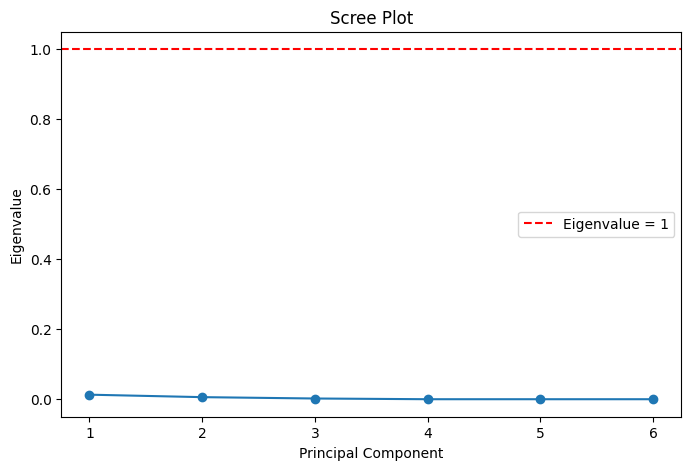


Monte Carlo Parallel Analysis:
Real eigenvalues:            [0.013 0.006 0.002 0.    0.    0.   ]
Average simulated eigenvalues: [3.757 2.182 1.241 0.616 0.217 0.   ]
Components to keep (True means retain): [False False False False False False]

Rotated Loadings (Varimax):
                                   Rotated_PC1  Rotated_PC2
Impact Category                                            
Acidification (AP)                   -0.063319     0.693258
Climate Change (CC)                   0.143454    -0.001145
Eutrophication (EP)                  -0.122737    -0.251377
Freshwater Eco-Toxicity (FAE)         0.497416     0.027791
Human Toxicity (HT)                   0.462559     0.023511
Marine Aquatic Eco-Toxicity (MAE)     0.497781     0.027826
Photochemical Oxidation (PO)         -0.058212     0.673296
Terrestrial Eco-Toxicity (TE)         0.497785     0.027826


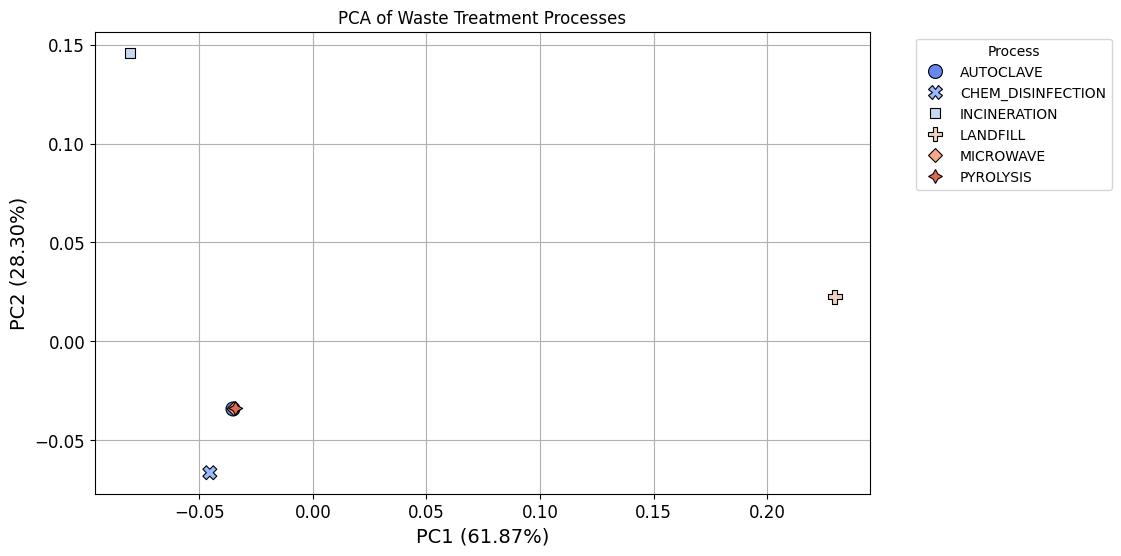

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Import functions for PCA validation tests from factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer import Rotator

# --- Assume weighted_matrix and decision_matrix_avg are already computed from your TOPSIS steps ---
# weighted_matrix: DataFrame (rows = processes, columns = criteria)
# decision_matrix_avg: DataFrame with Process names as index (for labeling)

# ===========================================
# 1. Data Suitability Tests: KMO & Bartlett
# ===========================================

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(weighted_matrix)
print("KMO Test Result:")
print("Overall KMO:", np.round(kmo_model, 3))  # Generally, KMO > 0.6 is acceptable

# Bartlett’s Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(weighted_matrix)
print("\nBartlett's Test of Sphericity:")
print(f"Chi-square = {chi_square_value:.3f}, p-value = {p_value:.3f}")
# p-value < 0.05 indicates that the correlation matrix is not an identity matrix

# ===========================================
# 2. Determine the Number of Components
# ===========================================

# Scree Plot
pca_full = PCA()  # No n_components specified to get all eigenvalues
pca_full.fit(weighted_matrix)
eigenvalues = pca_full.explained_variance_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='red', linestyle='--', label='Eigenvalue = 1')
plt.legend()
plt.show()

# Monte Carlo Parallel Analysis
def parallel_analysis(data, n_iter=10000, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = data.shape
    n_components = min(n_samples, n_features)  # Use effective number of components
    
    # PCA on real data
    real_pca = PCA(n_components=n_components)
    real_pca.fit(data)
    real_eigenvalues = real_pca.explained_variance_
    
    # Simulated eigenvalues
    simulated_eigenvalues = np.zeros((n_iter, n_components))
    for i in range(n_iter):
        random_data = np.random.normal(size=(n_samples, n_features))
        pca_sim = PCA(n_components=n_components)
        pca_sim.fit(random_data)
        simulated_eigenvalues[i, :] = pca_sim.explained_variance_
    
    mean_simulated = simulated_eigenvalues.mean(axis=0)
    components_to_keep = real_eigenvalues > mean_simulated
    return real_eigenvalues, mean_simulated, components_to_keep

real_eigs, sim_mean_eigs, keep_components = parallel_analysis(weighted_matrix, n_iter=10000)
print("\nMonte Carlo Parallel Analysis:")
print("Real eigenvalues:           ", np.round(real_eigs, 3))
print("Average simulated eigenvalues:", np.round(sim_mean_eigs, 3))
print("Components to keep (True means retain):", keep_components)

# Based on the Scree plot and parallel analysis, decide on the number of components.
# For illustration purposes, we proceed with 2 components.

# ===========================================
# 3. PCA with Varimax Rotation & Visualization
# ===========================================

# PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(weighted_matrix)
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage

# Varimax Rotation on PCA Loadings
# pca.components_.T gives the loadings matrix (features x components)
rotator = Rotator()
rotated_loadings = rotator.fit_transform(pca.components_.T)
rotated_loadings_df = pd.DataFrame(rotated_loadings,
                                   index=weighted_matrix.columns,
                                   columns=["Rotated_PC1", "Rotated_PC2"])
print("\nRotated Loadings (Varimax):")
print(rotated_loadings_df)

# Create DataFrame for visualization; preserving Process names from decision_matrix_avg
pca_df = pd.DataFrame(principal_components, 
                      columns=["PC1", "PC2"], 
                      index=decision_matrix_avg.index)
pca_df["Process"] = pca_df.index  # Convert index to column for hue mapping

# Axis labels including explained variance percentages
pc1_label = f"PC1 ({explained_variance[0]:.2f}%)"
pc2_label = f"PC2 ({explained_variance[1]:.2f}%)"

# Plot PCA Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Process", style="Process",
                palette="coolwarm", edgecolor="black", s=100)
plt.title("PCA of Waste Treatment Processes")
plt.xlabel(pc1_label, fontsize=14)
plt.ylabel(pc2_label, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Sensitivity analysis

INFO: Biosphere3 setup complete.


Biosphere database already present!!! No setup is needed


c:\Users\DicksonAbdul-Wahab\anaconda3\envs\lca_env311\Lib\site-packages\bw2data\backends\peewee\database.py:328: UserWarning: 
            Please use `del databases['HospitalProcesses']` instead.
            Otherwise, the metadata and database get out of sync.
            Call `.delete(warn=False)` to skip this message in the future.
            
  warnings.warn(MESSAGE.format(self.name), UserWarning)
INFO: Deleted existing database 'HospitalProcesses'.
INFO: Created and registered database 'HospitalProcesses'.
INFO: Starting Multi-Process Sensitivity Analysis for Waste-Treatment Processes...
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object

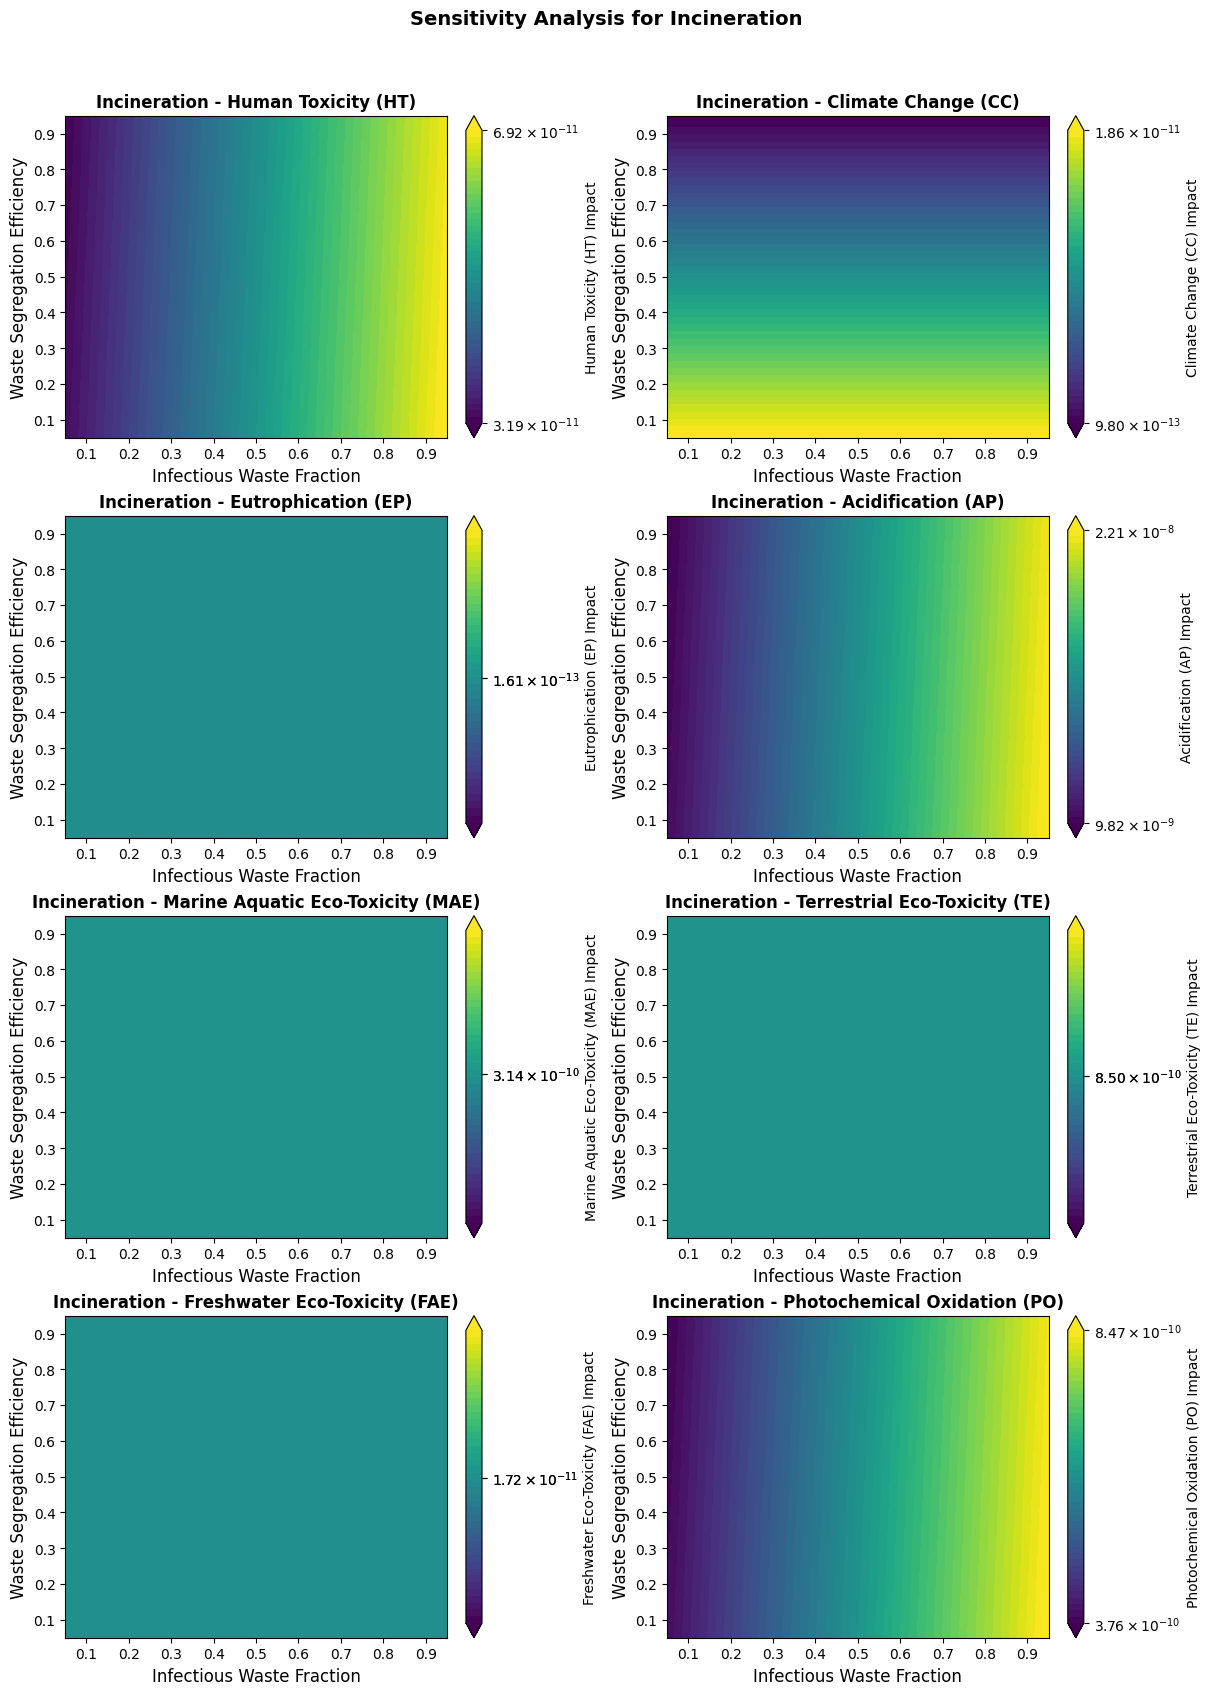

INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object


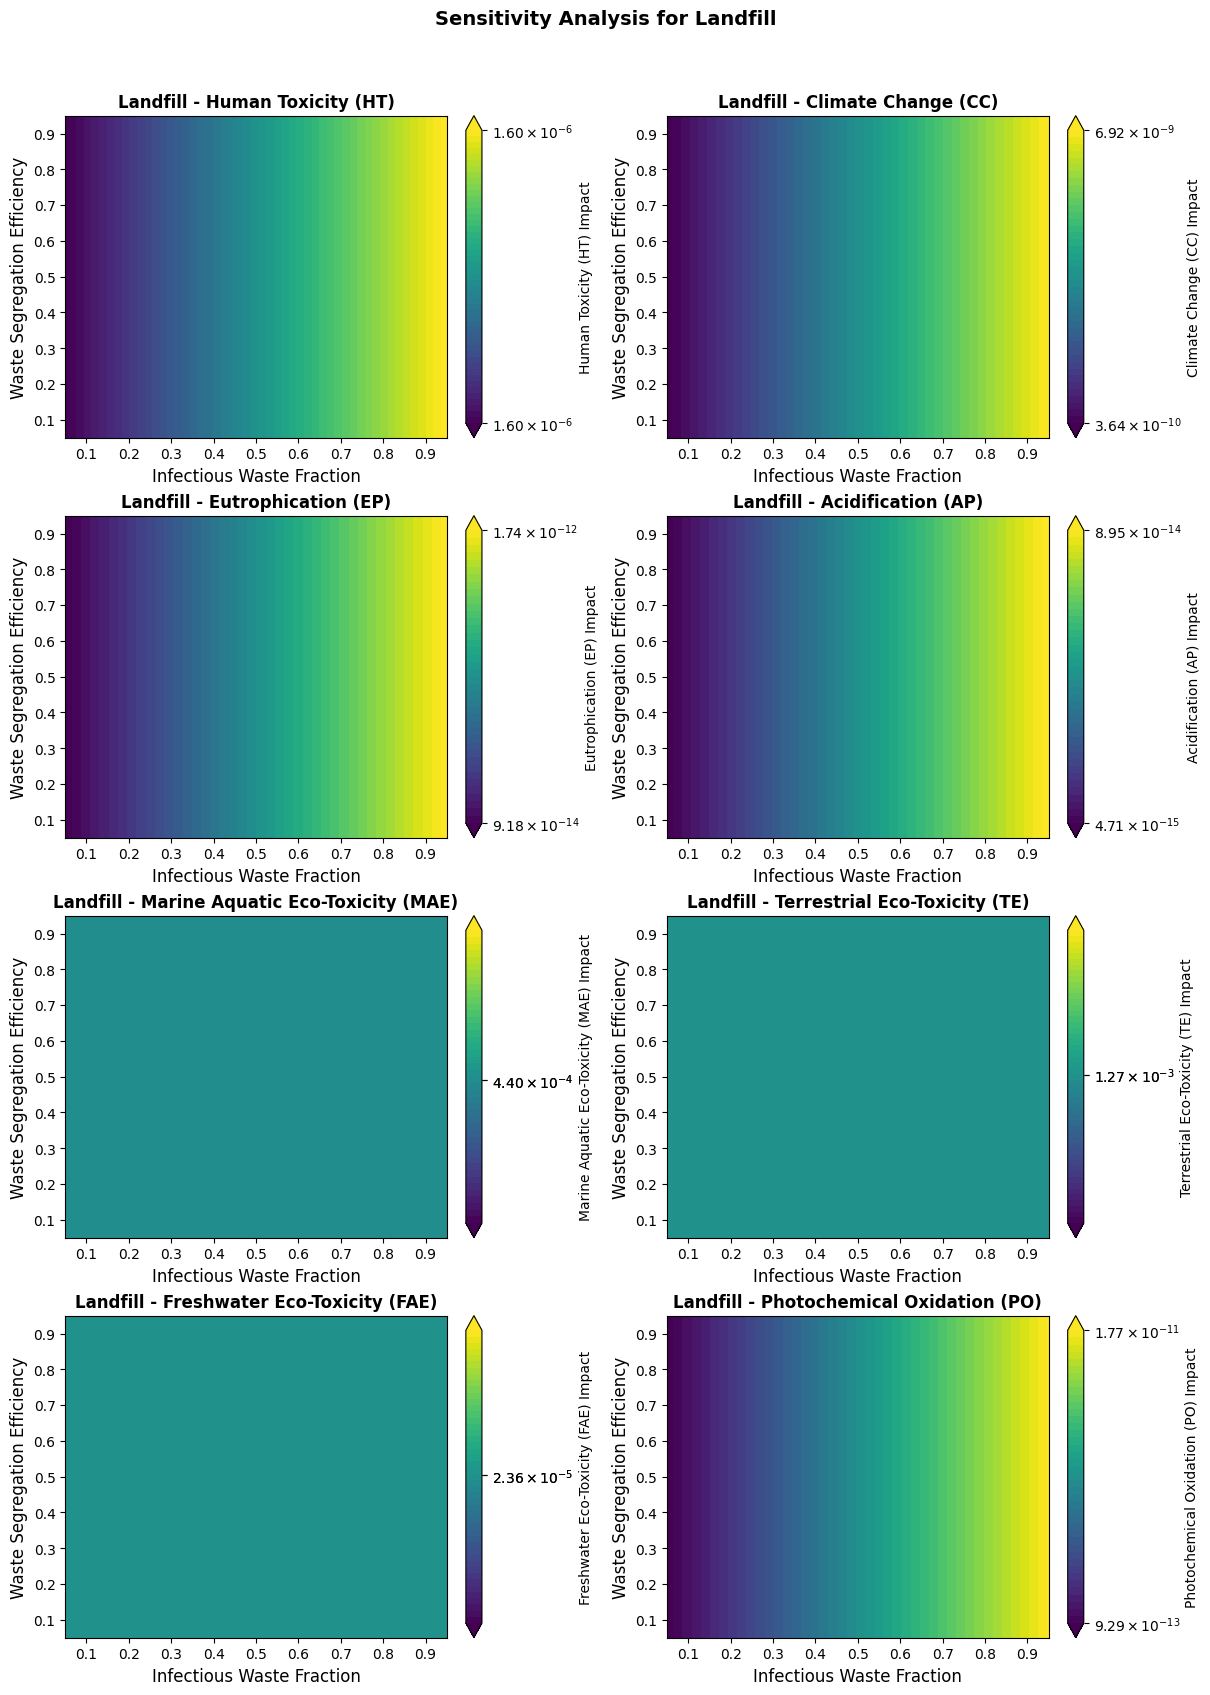

INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object


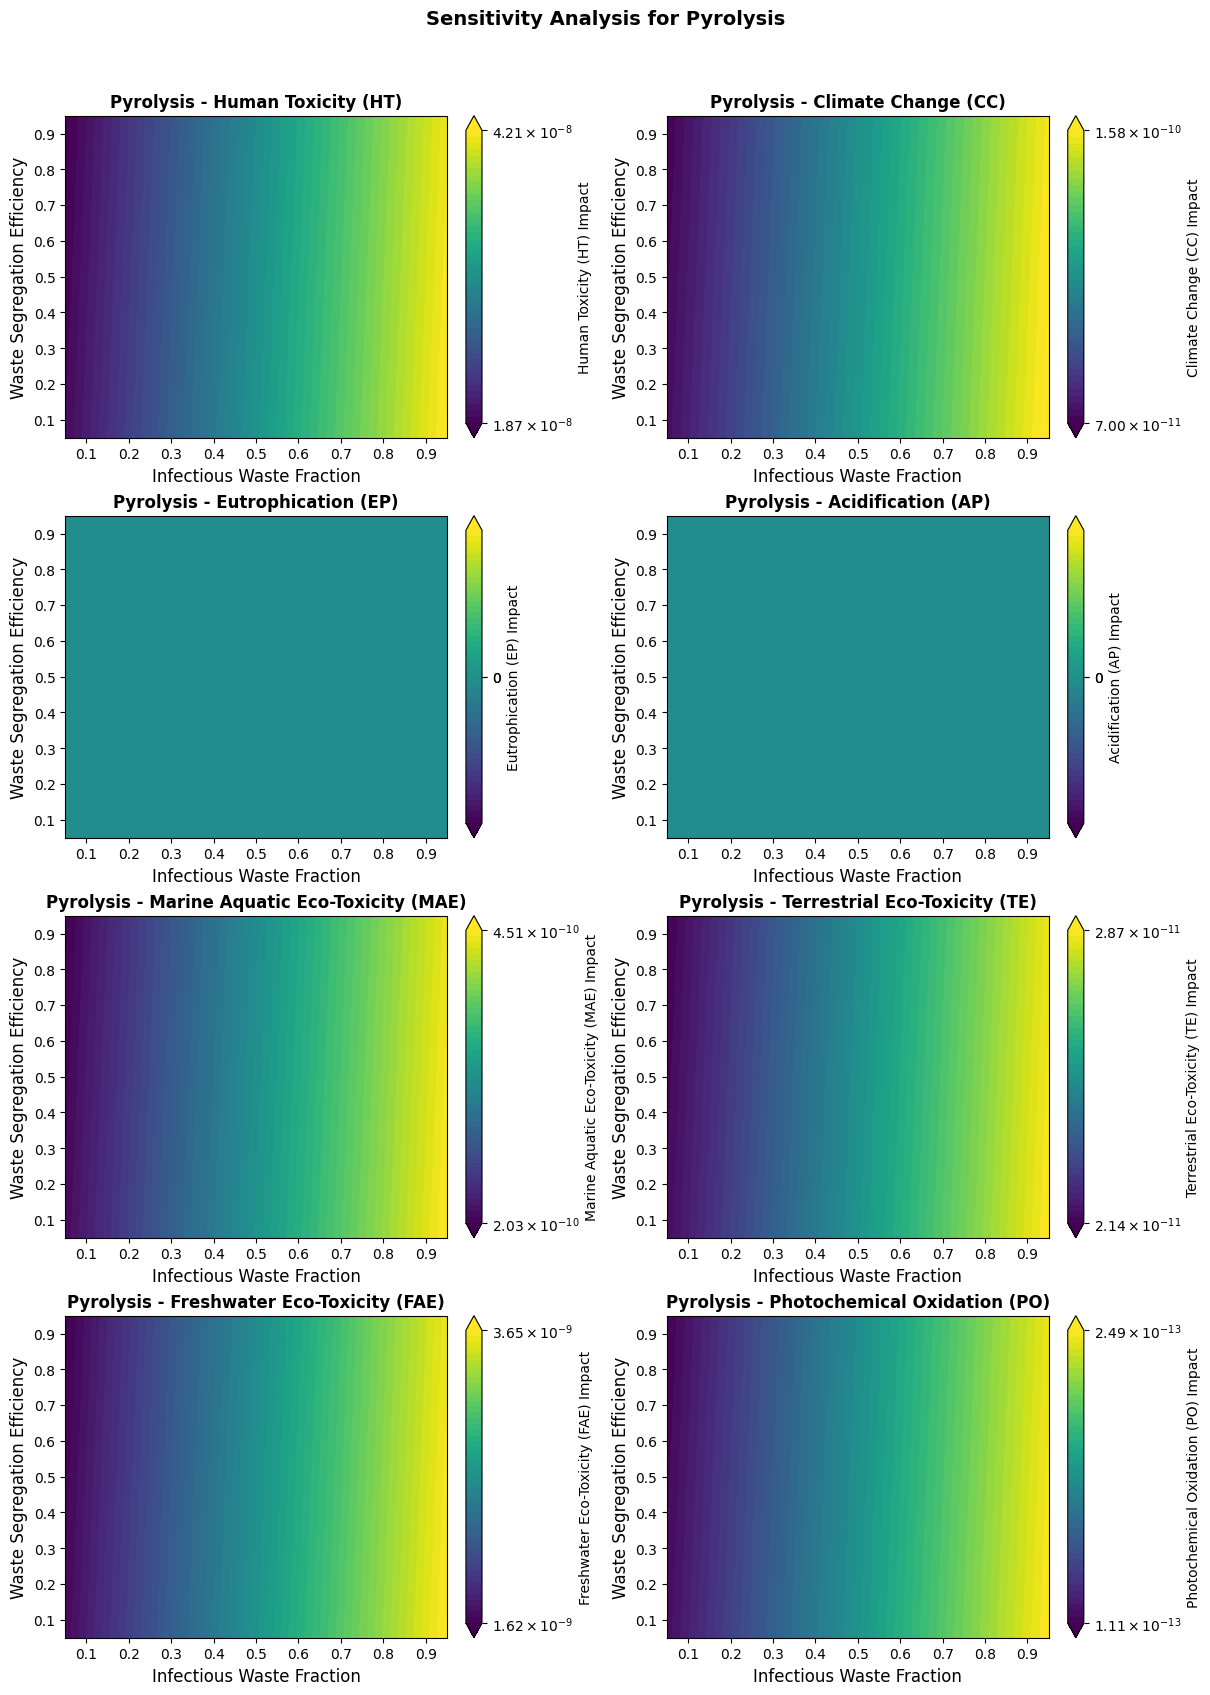

INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object


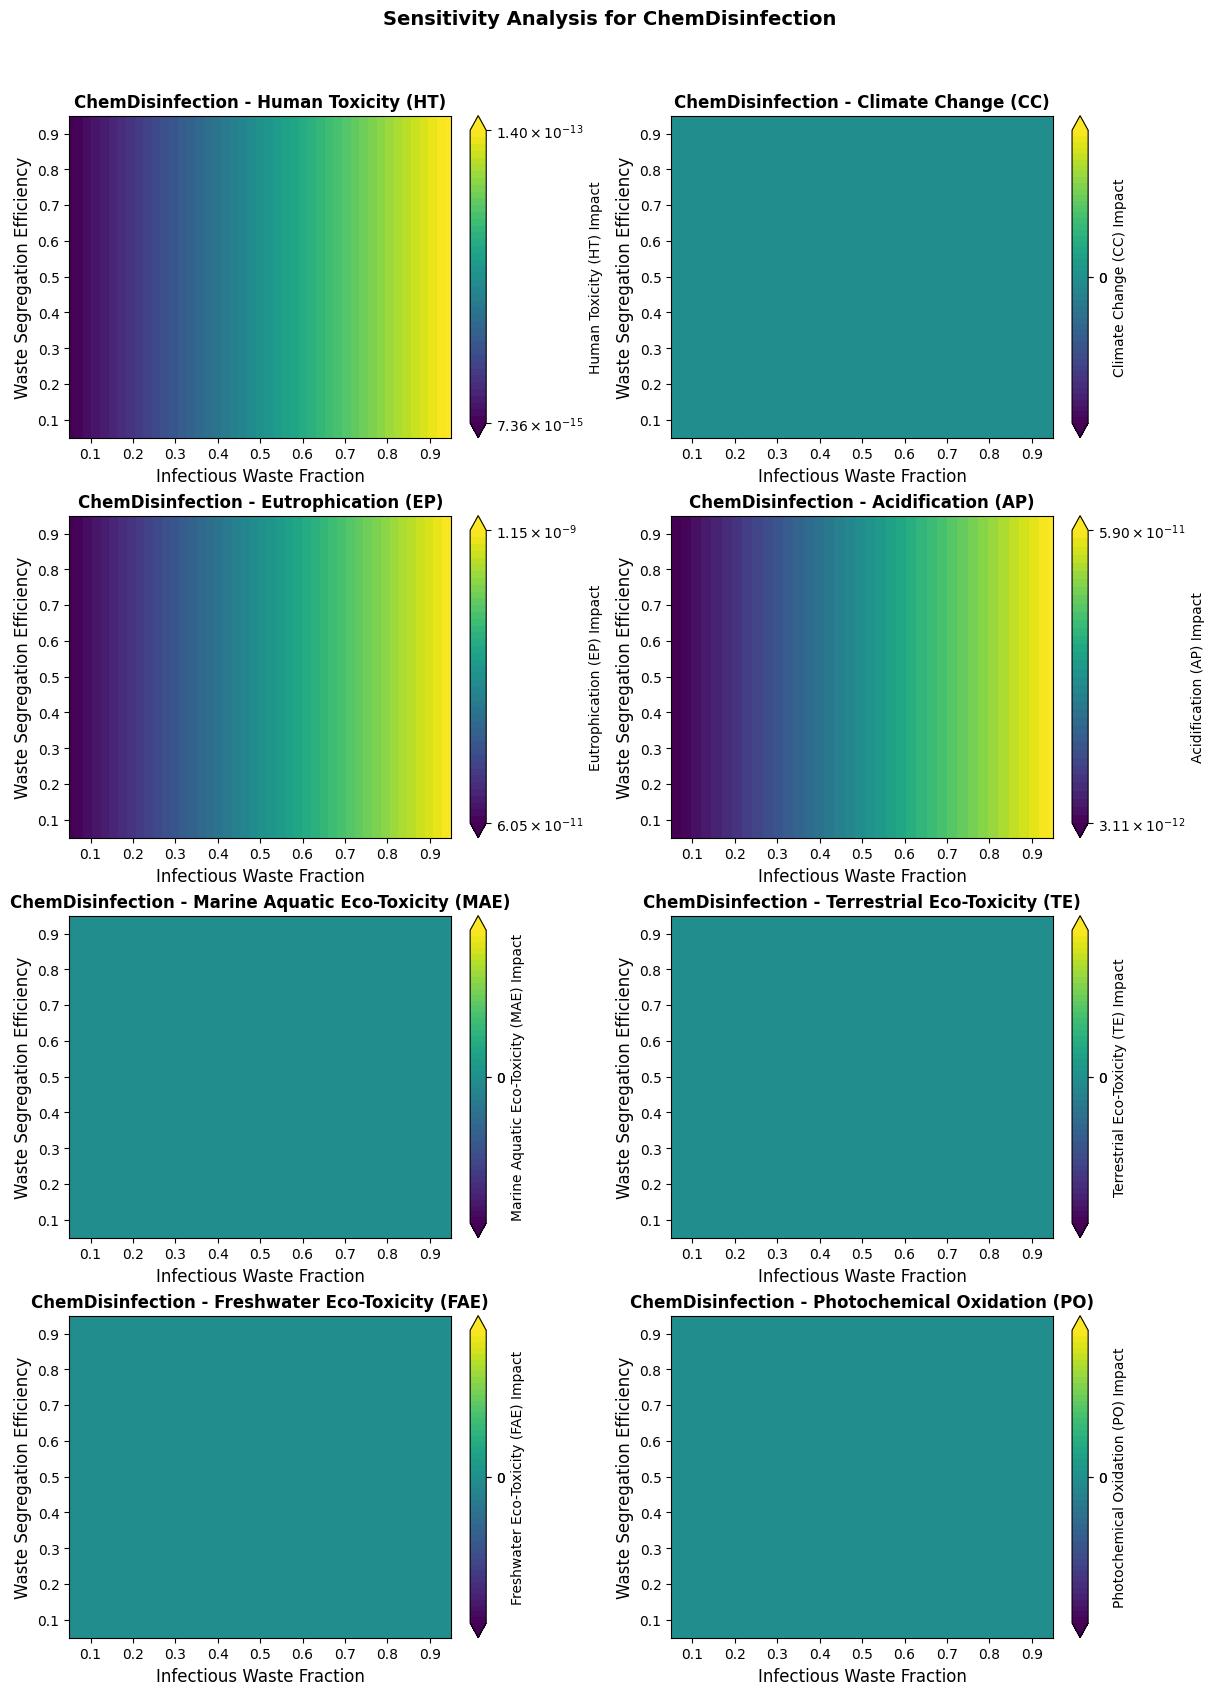

INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object


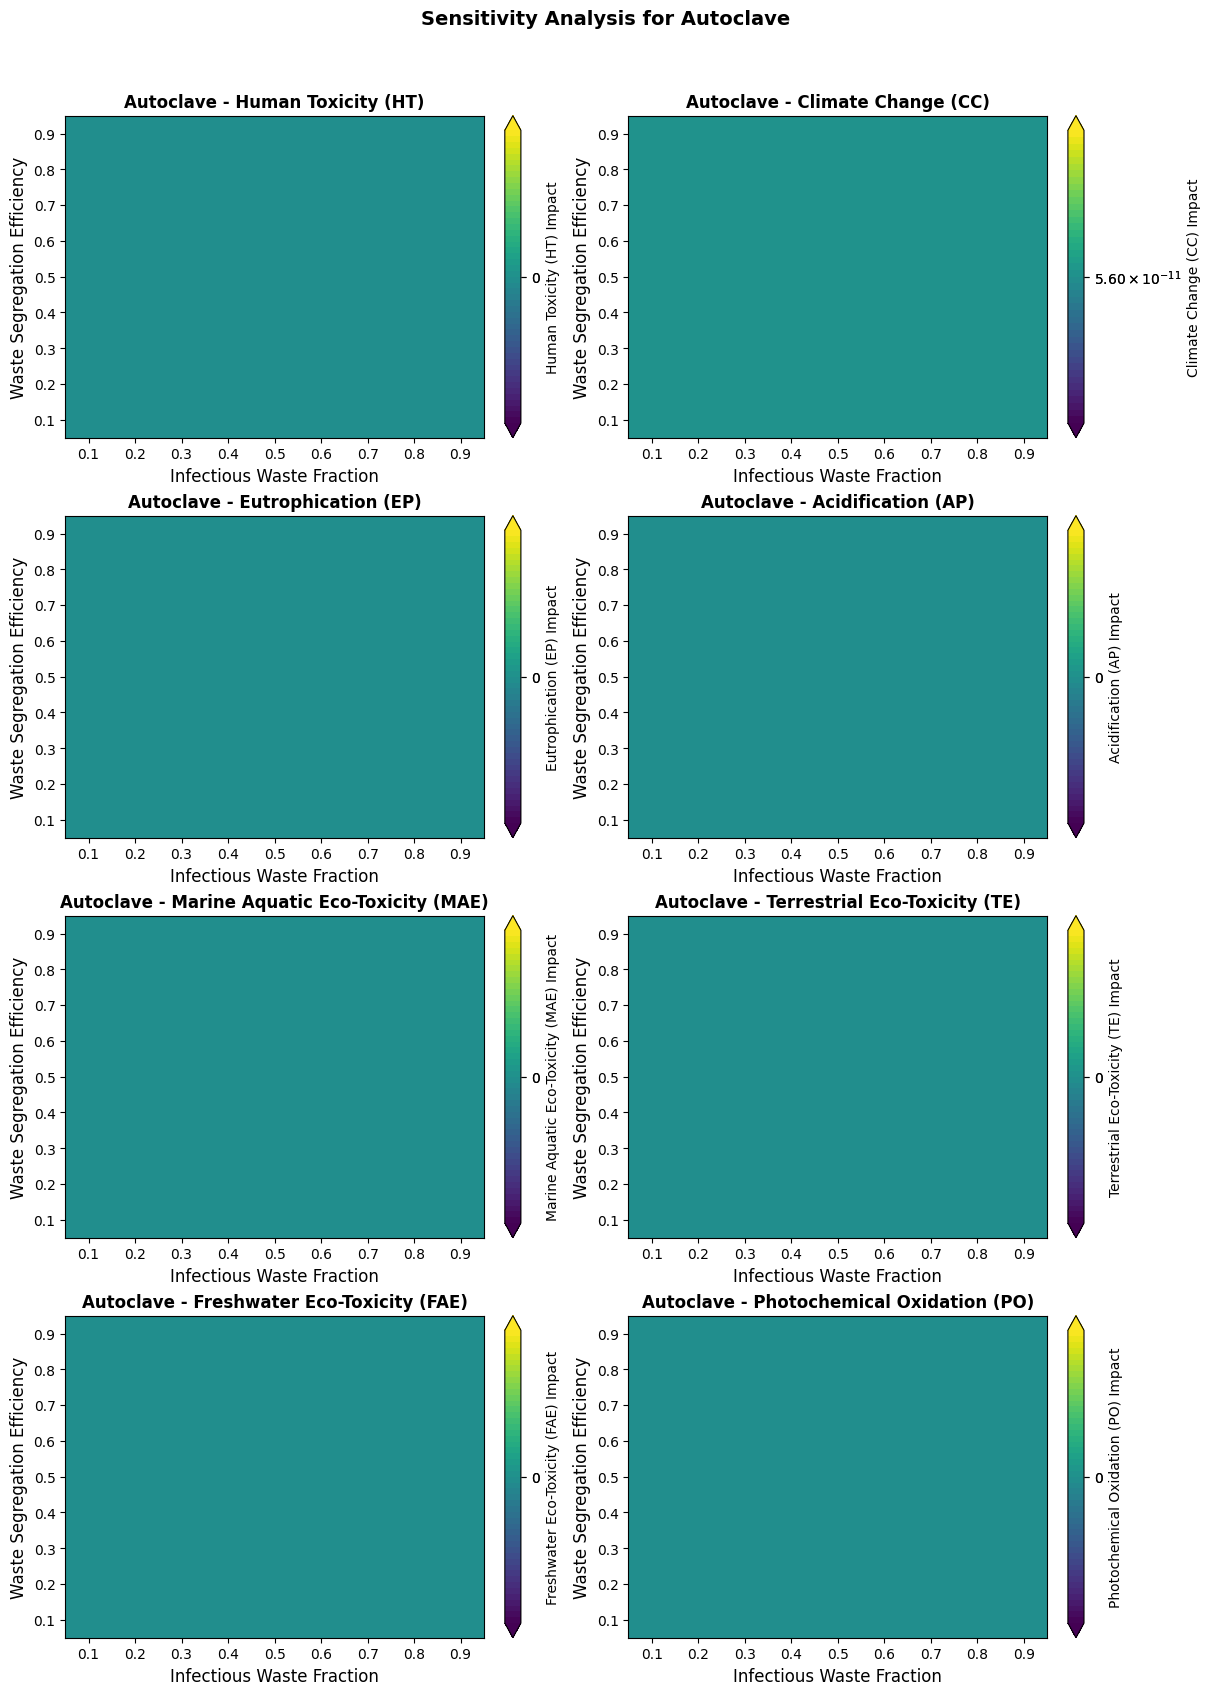

INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object
INFO: Created LCA object


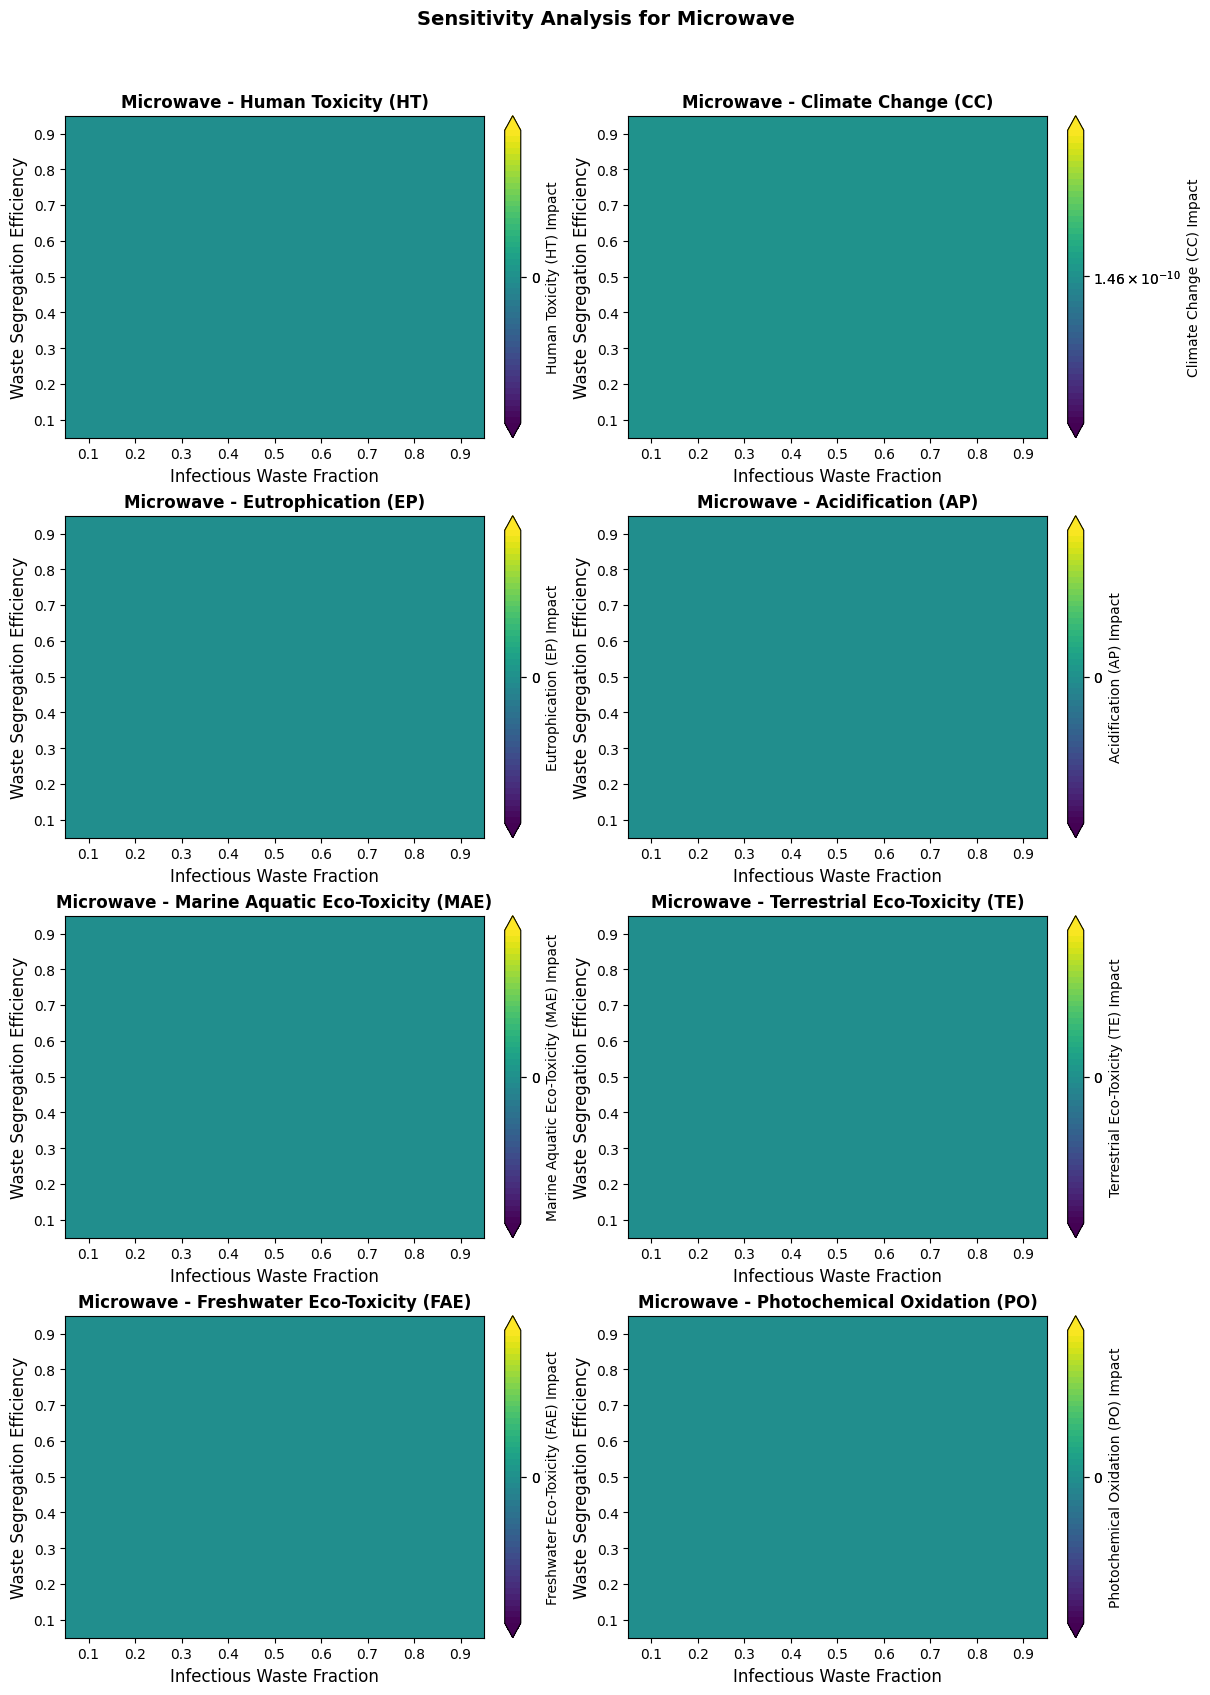

In [37]:
#!/usr/bin/env python3
"""
Multi-Process Sensitivity Analysis for Waste-Treatment Processes
This script demonstrates how to import waste-treatment process classes from your project,
simulate them, and compute LCIA results (for several impact categories) using Brightway2 via your
existing LCIA function (compute_lcia). The code performs both a sensitivity analysis
(using contour plots) and an uncertainty analysis (using Monte Carlo simulation).

Requirements:
  - Each process (in src/processes/) defines a `calculate_direct_emissions(waste, scenario)` method
    returning a dictionary of emissions.
  - The configuration (emission factors and DEFAULT_COMPOSITION) is defined in src/config.py.
  - The units module (with ureg) is available as src/units.py.
  - The Brightway2 project and databases are set up via src/database.py.
  - The LCIA computation is defined in src/lcia.py with the signature:
      compute_lcia(activity, method)
    where the function expects an activity (created via your database helper functions)
    and an LCIA method tuple (e.g., ('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)')).
"""

import logging
import uuid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from src.processes.incineration import IncinerationProcess
from src.processes.landfill import LandfillProcess
from src.processes.pyrolysis import PyrolysisProcess
from src.processes.chem_disinfection import ChemDisinfectionProcess
from src.processes.autoclave import AutoclaveProcess
from src.processes.microwave import MicrowaveProcess
from src import config
from src.waste_stream import WasteStream
from src.units import ureg
from src.lcia import compute_lcia
from src.database import (
    setup_project,
    build_flow_index,
    retrieve_flows,
    create_or_reset_db,
    create_activity,
    add_production_exchange,
    add_biosphere_exchanges,
)

# Custom Formatter: LaTeX-style Scientific Notation with 3 Significant Figures
def latex_scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    s = f"{x:.2e}"  # e.g., "1.823e+05"
    base, exp = s.split("e")
    exp = int(exp)
    return f"${base} \\times 10^{{{exp}}}$"


# Configure logging
logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")

# Define baseline waste mass (in kg)
BASE_WASTE_MASS = 2174

# Create a dictionary of process objects
processes = {
    "Incineration": IncinerationProcess("Incineration", config.EMISSION_FACTORS["INCINERATION"]),
    "Landfill": LandfillProcess("Landfill", config.EMISSION_FACTORS["LANDFILL"]),
    "Pyrolysis": PyrolysisProcess("Pyrolysis", config.EMISSION_FACTORS["PYROLYSIS"]),
    "ChemDisinfection": ChemDisinfectionProcess(
        "Chemical Disinfection", config.EMISSION_FACTORS.get("CHEM_DISINFECTION", {})
    ),
    "Autoclave": AutoclaveProcess("Autoclave", config.EMISSION_FACTORS.get("AUTOCLAVE", {})),
    "Microwave": MicrowaveProcess("Microwave", config.EMISSION_FACTORS.get("MICROWAVE", {})),
}

# Brightway2 Setup
project_name = "HospitalWasteManagement"
bio_db = setup_project(project_name)
flow_index = build_flow_index(bio_db)
flows = retrieve_flows(flow_index)
process_db = create_or_reset_db("HospitalProcesses")

custom_formatter = FuncFormatter(latex_scientific_formatter)

def adjust_for_infectious_fraction(waste, infectious_fraction: float) -> dict:
    """
    Adjusts the waste composition based on the infectious fraction.
    This function scales the values in the "infectious_waste" category so that
    the total infectious fraction matches the provided infectious_fraction.
    """
    new_comp = copy.deepcopy(waste.composition)
    if "infectious_waste" in new_comp:
        default_infectious = sum(new_comp["infectious_waste"].values())
        if default_infectious > 0:
            scale_factor = infectious_fraction / default_infectious
            for key in new_comp["infectious_waste"]:
                new_comp["infectious_waste"][key] *= scale_factor
    return new_comp


def simulate_process(process, segregation_efficiency, infectious_fraction, scenario_params=None):
    """
    Simulates a waste-treatment process under specified parameters and computes its
    LCIA impacts for all impact categories.
    """
    waste = WasteStream(mass=BASE_WASTE_MASS * ureg("kg"), composition=config.DEFAULT_COMPOSITION)
    waste.composition = adjust_for_infectious_fraction(waste, infectious_fraction)
    adjusted_waste = waste.adjust_for_segregation(segregation_efficiency)

    scenario = {"incineration_flue_gas_efficiency": 0.5}
    if scenario_params:
        scenario.update(scenario_params)

    direct_emissions = process.calculate_direct_emissions(adjusted_waste, scenario)
    unique_code = f"temp_activity_{uuid.uuid4()}"
    activity = create_activity(process_db, code=unique_code, name="Temporary Activity", unit="kilogram")
    add_production_exchange(activity)
    add_biosphere_exchanges(activity, direct_emissions, flows)

    impacts = {}
    for category, method in config.IMPACT_CATEGORIES.items():
        try:
            raw_score = compute_lcia(activity, method)
        except Exception as e:
            logging.error(f"Error computing LCIA for {category} on process {process.name}: {e}")
            raw_score = None
        norm_factor = config.NORMALIZATION_FACTORS.get(category, 1)
        normalized = raw_score / norm_factor if raw_score is not None and norm_factor != 0 else None
        impacts[category] = normalized
    return impacts


def run_sensitivity_analysis():
    """
    Performs a sensitivity analysis by varying the waste segregation efficiency and infectious waste fraction.
    For each process and each impact category, a contour plot is generated showing how the LCIA impact varies.
    """
    seg_eff_range = np.linspace(0.05, 0.95, 20)  # Increased resolution for smoother contours
    inf_frac_range = np.linspace(0.05, 0.95, 20)

    for proc_name, proc_obj in processes.items():
        impact_matrices = {cat: np.zeros((len(seg_eff_range), len(inf_frac_range))) for cat in config.IMPACT_CATEGORIES.keys()}
        for i, seg_eff in enumerate(seg_eff_range):
            for j, inf_frac in enumerate(inf_frac_range):
                impacts = simulate_process(proc_obj, seg_eff, inf_frac)
                for cat, score in impacts.items():
                    impact_matrices[cat][i, j] = score if score is not None else 0

        num_categories = len(config.IMPACT_CATEGORIES)
        ncols = 2
        nrows = int(np.ceil(num_categories / ncols))
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4), constrained_layout=True)
        axes = axes.flatten()

        X, Y = np.meshgrid(inf_frac_range, seg_eff_range)
        for idx, (cat, matrix) in enumerate(impact_matrices.items()):
            contour = axes[idx].contourf(X, Y, matrix, levels=50, cmap="viridis", extend="both")

            # Calculate and annotate the median value.
            median_val = np.median(matrix[matrix != 0]) if np.any(matrix != 0) else 0
            

            # Get the min and max values for the colorbar ticks.
            min_val = np.min(matrix[matrix != 0]) if np.any(matrix != 0) else 0
            max_val = np.max(matrix)

            # Set the colorbar with only min and max ticks.
            cbar = fig.colorbar(contour, ax=axes[idx], format=custom_formatter)
            cbar.set_ticks([min_val, max_val])
            cbar.ax.tick_params(labelsize=10)
            cbar.set_label(f"{cat} Impact", fontsize=10)

            axes[idx].set_title(f"{proc_name} - {cat}", fontsize=12, fontweight="bold")
            axes[idx].set_xlabel("Infectious Waste Fraction", fontsize=12)
            axes[idx].set_ylabel("Waste Segregation Efficiency", fontsize=12)

        for idx in range(len(impact_matrices), len(axes)):
            axes[idx].axis("off")

        plt.suptitle(f"Sensitivity Analysis for {proc_name}", fontsize=14, fontweight="bold", y=1.05)
        plt.savefig(f"sensitivity_{proc_name}.pdf", dpi=300, bbox_inches="tight")  # Save as high-res PDF
        plt.show()


def main():
    logging.info("Starting Multi-Process Sensitivity Analysis for Waste-Treatment Processes...")
    run_sensitivity_analysis()


if __name__ == "__main__":
    main()